# bike-share data exploration
## by rey sawan

## project overview

Over the last couple of years, mobility services have grown exponentially. From ride sharing services like Uber and Lyft, to car pooling services, all the way down to bike and scooter sharing services that have cluttered the streets and aggravated many. The quick adoption and high demand of these services has left some serious systemic issues go unchecked and unanswered for. Uber's recent missteps is a prime example of the nascency of legislature and securities of these services, and the chaos that ensues when these services are abused.

For this project, I chose to explore Ford Go-Bike's bike sharing data for San Fransisco. The data I've decided to look at spans from mid 2017 through to mid 2020. While this project will leave me far from finding a solution for these systemic issues, it will help me gain a deeper understanding of trends and patterns in its use in San Fransisco. Hopefully getting me closer to understanding what has caused the exponential adoption of these services.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ford_gobike_clean.csv')

In [ ]:
#do some necessary cleaning for datetime values
df.start_time = pd.to_datetime(df['start_time'])
df.end_time = pd.to_datetime(df['end_time'])

## key insights

From the data exploration, we uncovered two key insights. Although it's just a small step in the direction of understanding the exponential growht of these services. These two insights help us better understand how and wehn people use Ford Go-Bike's bike sharing services. Helping us make assumptions about their uses for these services. 

**1. Subscribers' main use for bike sharing services are  specific and planned.**
<br>
**2. There are two tiers of one time customers: the tourists and the emergency bikers.**

## 1. Subscribers' main use for bike sharing services are specific and planned. 

### Starting from a basic overview of the data, we can see that a good chunk of rides were from subscribers. 

In [ ]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#how are user types split?
df.user_type.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['b','r']);

### When looking at the frequency of rides between the two user types, and the distribution of durations, aside from the clear differences in frequency we can see two trends: a bimodal distribution indicating that Subscribers frequent at specific times of the day, and a distribution that indicates Subscribers take shorter trips.

In [ ]:
#what does the subscription vs one-time customer usage look like by hour? 
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

fig, ax = plt.subplots(ncols = 2, nrows = 2 , figsize = [10,10])

time = df[['user_type', 'start_time']].copy()
time.start_time = time.start_time.dt.hour

time[time.user_type == 'Subscriber']['start_time'].hist(bins=24, rwidth=0.8, color='b', ax = ax[0,0])
ax[0,0].set_ylim([0, 1000000])
ax[0,0].set_title('Subscriber')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_xlabel('Time')

time[time.user_type == 'Customer']['start_time'].hist(bins=24, rwidth=0.8, color='r', ax = ax[0,1])
ax[0,1].set_ylim([0, 1000000])
ax[0,1].set_title('Customer')
ax[0,1].set_yticklabels('')
ax[0,1].set_xlabel('Time')

dur = df[['user_type', 'duration_sec']].copy()
#convert to minutes
dur.duration_sec = dur.duration_sec / 60

#set bin edges to double every minute and locations
bin_edges = 2**np.arange(0, np.log2(2048), 1)
xtick_locs = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

dur[dur.user_type == 'Subscriber']['duration_sec'].hist(bins=bin_edges, color='b', ax = ax[1,0])
ax[1,0].set_xscale('log')
ax[1,0].set_xticks(xtick_locs)
ax[1,0].set_xticklabels(xtick_locs)
ax[1,0].set_xlabel('Duration')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_ylim([0, 3200000])

dur[dur.user_type == 'Customer']['duration_sec'].hist(bins=bin_edges, color='r', ax = ax[1,1])
ax[1,1].set_xscale('log')
ax[1,1].set_xticks(xtick_locs)
ax[1,1].set_xticklabels(xtick_locs)
ax[1,1].set_xlabel('Duration')
ax[1,1].set_ylim([0, 3200000])
ax[1,1].set_yticklabels('');

### When we split the data by region we reveal that the "cities" tended to have a far greater amount of subscribers to customers. 

In [ ]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 4, 1)
ax = df[df['start_station_area'] == 'San Fransisco']['user_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['b','r']);
ax.set_title('San Fransisco')


plt.subplot(1, 4, 2)
ax2 = df[df['start_station_area'] == 'East Bay']['user_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['b','r']);
ax2.set_title('East Bay')

plt.subplot(1, 4, 3)
ax3 = df[df['start_station_area'] == 'San Jose']['user_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['b','r']);
ax3.set_title('San Jose')

plt.subplot(1, 4, 4)
ax4 = df[df['start_station_area'] == 'Other']['user_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['r', 'b']);
ax4.set_title('Other');

### Further supported by the distinct bimodal distributions of San Fransisco and East Bay. The two larger cities compared to San Jose and Other (which has been established as mainly out of city bike zones).

In [ ]:
#set up our charts area
fig, ax = plt.subplots(ncols = 2, nrows = 4 , figsize = [10,10])

#what do regioanl trends look like in duration and by user type?
data = df[['user_type', 'start_station_area', 'start_time']].copy()
#convert start time to hours
data.start_time = data.start_time.dt.hour

#set up the data for san fransisco splitting the data by user type
data[(data.user_type == 'Subscriber') & (data.start_station_area == 'San Fransisco')]['start_time'].hist(bins=24, color='b', ax = ax[0,0])
ax[0,0].set_ylabel('San Fransisco')
ax[0,0].set_xticklabels('')
ax[0,0].set_ylim([0, 800000])
ax[0,0].set_title('Subscriber')

data[(data.user_type == 'Customer') & (data.start_station_area == 'San Fransisco')]['start_time'].hist(bins=24, color='r', ax = ax[0,1])
ax[0,1].set_yticklabels('')
ax[0,1].set_xticklabels('')
ax[0,1].set_ylim([0, 800000])
ax[0,1].set_title('Customer')


#set up the data for san jose splitting the data by user type
data[(data.user_type == 'Subscriber') & (data.start_station_area == 'San Jose')]['start_time'].hist(bins=24, color='b', ax = ax[1,0])
ax[1,0].set_ylabel('San Jose')
ax[1,0].set_xticklabels('')
ax[1,0].set_ylim([0, 40000])

data[(data.user_type == 'Customer') & (data.start_station_area == 'San Jose')]['start_time'].hist(bins=24, color='r', ax = ax[1,1])
ax[1,1].set_yticklabels('')
ax[1,1].set_xticklabels('')
ax[1,1].set_ylim([0, 40000])


#set up the data for east bay splitting the data by user type
data[(data.user_type == 'Subscriber') & (data.start_station_area == 'East Bay')]['start_time'].hist(bins=24, color='b', ax = ax[2,0])
ax[2,0].set_ylabel('East Bay')
ax[2,0].set_xticklabels('')
ax[2,0].set_ylim([0, 200000])

data[(data.user_type == 'Customer') & (data.start_station_area == 'East Bay')]['start_time'].hist(bins=24, color='r', ax = ax[2,1])
ax[2,1].set_yticklabels('')
ax[2,1].set_xticklabels('')
ax[2,1].set_ylim([0, 200000])


#set up the data for other splitting the data by user type
data[(data.user_type == 'Subscriber') & (data.start_station_area == 'Other')]['start_time'].hist(bins=24, color='b', ax = ax[3,0])
ax[3,0].set_ylabel('Other')
ax[3,0].set_ylim([0, 4000])
ax[3,0].set_xlabel('Time')

data[(data.user_type == 'Customer') & (data.start_station_area == 'Other')]['start_time'].hist(bins=24, color='r', ax = ax[3,1])
ax[3,1].set_yticklabels('')
ax[3,1].set_ylim([0, 4000])
ax[3,1].set_xlabel('Time')

plt.show();

**To condclude the first insight,** Subscribers showed signs of having more specific, commute-related uses for the bike services. While one time customers showed no real indication of recurring time trends -- demonstrating a less specific use for the bikes. If I were working with Ford Go Bike I would encourage the teams to consider targetting their marketing toward working professionals who may struggle with parking or long commutes.

## 2. There are two tiers of one time customers: the tourists and the emergency bikers.

### As discussed in the previous chart, when looking at duration and time rented there didn't seem to be any specific use for bikes when it came to one-time customers. However, when we start looking at when in the week or the year one time customers rented, we start to uncover some new possibilities. <br><br> For the below chart. we can see distinct spikes in use for customers in less city-centric neighborhood around the weekends. This, along with the even distributions of use for one-time customers, hints at the possiblity that one-time customers may be tourists. 

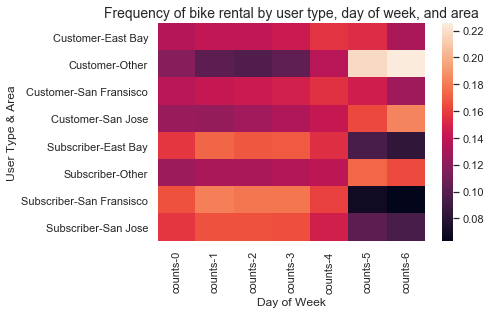

In [8]:
#parse the data that we will be looking at
data = df[['user_type', 'start_time', 'start_station_area']].copy()
#create counts column to track entries
data['counts'] = 1 
#create month column to track frequency trends throughout the year
data['day'] = data['start_time'].dt.weekday

#groupby the variables and calculate the averages 
data = data.groupby(['user_type', 'start_station_area', 'day']).sum().unstack().apply(lambda x: x/x.sum(), axis=1)

#create location values  
users = [['Subscriber', 'Customer']]

#plot heatmap based on location
for user in users:
        sns.heatmap(data.loc[user])

plt.title('Frequency of bike rental by user type, day of week, and area', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('User Type & Area');

### Looking at this data by month tells a different, much colder story. Activity for one-time customers seems to spike the most in the three first months of the year. When California is arguably at its coldest! This leads me to believe that partial use for one-time customers may be out of emergency. That is, people who typically commute by foot may opt for a quick bike ride instead during the colder months of the year. 

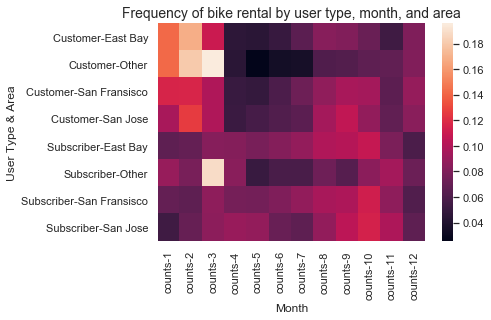

In [9]:
#parse the data that we will be looking at
data = df[['user_type', 'start_time', 'start_station_area']].copy()
#create counts column to track entries
data['counts'] = 1 
#create month column to track frequency trends throughout the year
data['month'] = data['start_time'].dt.month

#groupby the variables and calculate the averages 
data = data.groupby(['user_type', 'start_station_area', 'month']).sum().unstack().apply(lambda x: x/x.sum(), axis=1)

#create location values  
users = [['Subscriber', 'Customer']]

#plot heatmap based on location
for user in users:
        sns.heatmap(data.loc[user])

plt.title('Frequency of bike rental by user type, month, and area', fontsize=14)
plt.xlabel('Month')
plt.ylabel('User Type & Area');

**To condclude the second insight,** one-time customers seem to have two uses for bike sharing services: 1) for leisure, and unspecific use, and 2) as an emergency commute option during colder months of the year. If I were working with Ford Go Bike's marketing team, I'd focus my efforts on securing the emergency one-time users as subscribers! Encouraging them to see the benefits of a subscription. 

# Thank you for taking the time to read my report!
### If you happen to work for Lyft and enjoyed my take on the data, or are hiring, connect with me on LinkedIn. <br>I'd love to chat! 

https://www.linkedin.com/in/reysawan/

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 336499 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
